# Modelling Overview & Industry Application


We will see some of the modelling applications on the business use case data.we will have an extensive sessions on different model building theoretical & Practical concepts at the later sessions.Let's take an example of Bank's fraud detection,every day in a bank there are several tons of transactions out of which there are meagre chances of transactions turing out to be fraud .we will see one small example how to predict/classify a transaction to be fraud.  

# Bank Fraud Classification

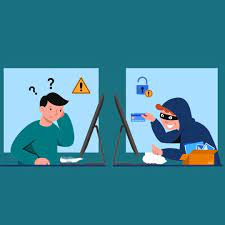

# Reading the dataset

Let's see the dataset thoroughly and get all the feautres very carefully.In this dataset we are going to classify the transaction whether  it is a fraud/not fraud.The details of all the feautres are given below.

Type:- It tells us the mode of transactions CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount:- amount of the transaction in local currency.

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

oldbalanceDest - initial balance recipient before the transaction. 

newbalanceDest - new balance recipient after the transaction.

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts.


Importing pandas library to read the dataset

In [15]:
import pandas as pd  


df=pd.read_csv('fraud data.csv')
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,4,181.00,181.0,0.00,0.0,0.0,1,0
3,2,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


# Data Preparation

Data preparation is the most important step which is crucial in modelling technique .Later in the sessions we will discuss more on the data preparation. 

# Train Test Split


A train test split is when you split your data into a training set and a testing set. The training set is used for training the model, and the testing set is used to test your model. This allows you to train your models on the training set, and then test their accuracy on the unseen testing set. For this we use a function from a library called sklearn.


In [7]:
from sklearn.model_selection import train_test_split

In [9]:
train,test = train_test_split(df, test_size = 0.30,random_state=400)

test_size:- we are splitting the dataset 70 percent records to train data and 30 percent records to test data . 
    
random_state :- The random state hyperparameter in the train_test_split() function controls the shuffling process.
With random_state=None , we get different train and test sets across different executions and the shuffling process 
is out of control.With random_state=0 , we get the same train and test sets across different executions.

# Model Building

we will be using a classification algorithm called Logsitic regression, There are more classification algorithms which will be 
followed in the latter sessions.And we will cover in depth the logistic regression in the following session.

In [11]:
from sklearn.linear_model import LogisticRegression

In [23]:
predictors=['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest', 'isFlaggedFraud']  # these are the predictors columns

target=['isFraud'] # this is the traget column

In [26]:
# converting all the values  to numpy array/matrix

X=train[predictors].values
y=train[target].values

In [28]:
# we are fitting the model  to train the data.

model=LogisticRegression(random_state=0)
model.fit(X,y)                        

C:\Users\Biswajit Roy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

# Prediction on Test data 

Once we are done with the training data we will now had to evaluate the model with the test data we will see how the model learnt the training data and would help to predict or classify the transaction as fraud/ not fraud transaction. we have collated some of the arbitary  transactions to check whether the model is able to classify the transactions fraud/Not


In [51]:
test_trans1=np.array([1,3099.97,20771.00,17671.03,0.00,0.00,0]).reshape(1,-1)
test_trans2=np.array([3,5529.13,8547.0,3017.87,10206.0,0.0,0]).reshape(1,-1)
test_trans3=np.array([1,11633.76,10127.0,0.00,0.0,0.0,0]).reshape(1,-1)

In [50]:
prediction1=model.predict(test_trans1)
print("Model classified the transaction 1",prediction1)

prediction2=model.predict(test_trans2)
print("Model classified the transaction 2",prediction2)

prediction3=model.predict(test_trans3)
print("Model classified the transaction 3",prediction3)

Model classified the transaction 1 [0]
Model classified the transaction 2 [0]
Model classified the transaction 3 [1]


In [45]:
test.head(3)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
11,1,3099.97,20771.0,17671.03,0.0,0.0,0,0
59,3,5529.13,8547.0,3017.87,10206.0,0.0,0,0
13,1,11633.76,10127.0,0.00,0.0,0.0,0,0


# Model Evaluation

There are model evaluation methods where we will be able to evaluate the model's performance on using
different metrics such as  roc_auc, classification report, confusion matrix ,Accuracy.But we will discuss in detail 
in the next slides.

# Conclusion

if You compare the three transaction's true label and the predicted label you will observe that the third transaction's evaluation is classified fraud but in reality it is not fraud. So here is the catch everytime model is not perfect you require more trail runs to  make the model learned and perfect.



In [52]:
####################################################################################################

# House price prediction
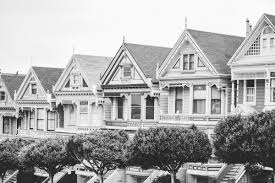

Now in this section we will cover the regression  Modelling technique where we will be able to forecast/predict the house price
on the basis of some  housing parameters.

# Reading the dataset

Let's read the dataset and will also see to explore the features.


Area:- Area of the Property in square feet

BHK :- No. of Bedrooms along with 1 Hall and 1 kitchen

Bathroom:-  No. of Bathrooms

Furnishing:- Whether listed property is furnished , unfurnished or semi furnished

Parking:-  No. of parking available

Price :- This is the Price of property in INR

Status:- property's status as in 'ready to move' or still under construction

Transaction:- Its a new property or being re-sold

Type:- Its an Apartment or Builder Floor

Per_Sqft :- The area in SQ FT

In [3]:
# importing pandas as library
import pandas as pd

df=pd.read_csv('Houseprice.csv')
df.head()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,2,1.0,6500000,4,1,2,6667
1,750.0,2,2.0,2,1.0,5000000,4,1,1,6667
2,950.0,2,2.0,1,1.0,15500000,4,2,1,6667
3,600.0,2,2.0,2,1.0,4200000,4,2,2,6667
4,650.0,2,2.0,2,1.0,6200000,4,1,2,6667


# Data Preparation

Data preparation is the most important step which is crucial in modelling technique .Later in the sessions we will discuss more on the data preparation. 

# Train Test Split


train test split function is when you split your data into a training set and a testing set. The training set is used for training the model, and the testing set is used to test your model. This allows you to train your models on the training set, and then test their accuracy on the unseen testing set. For this we use a function from a library called sklearn.

In [1]:
from sklearn.model_selection import train_test_split

In [4]:
df=df.dropna()
train,test = train_test_split(df, test_size = 0.30,random_state=400)

test_size:- we are splitting the dataset 70 percent records to train data and 30 percent records to test data .

random_state :- The random state hyperparameter in the train_test_split() function controls the shuffling process. With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control.With random_state=0 , we get the same train and test sets across different executions.

# Model Building

we will be using a regression algorithm called Linear regression, There are more Regression algorithms which will be 
followed in the latter sessions.And we will cover in depth the linear regression in the following session.

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
predictors=['Area', 'BHK', 'Bathroom', 'Furnishing', 'Parking','Status','Transaction', 'Type', 'Per_Sqft']  # these are the predictors columns

target=['Price'] # this is the traget column

In [7]:
# converting all the values  to numpy array/matrix

X=train[predictors].values
y=train[target].values

In [8]:
# we are fitting the model  to train the data.

model=LinearRegression()
model.fit(X,y)                        

LinearRegression()

# Prediction on Test data 

Once we have trained the model on the training data we will try to evaluate the model's performance on the test data.So we 
will be pulling some transanctional records for predicting the House price given some conditions.

In [93]:
test_1=np.array([870.0,3,2.0,2,1.0,4,1,2,6154]).reshape(1,-1)
test_2=np.array([1100.0,3,3.0,3,1.0,4,1,2,22000]).reshape(1,-1)
test_3=np.array([660.0,2,2.0,2,1.0,4,2,2,6154]).reshape(1,-1)

In [91]:
test.head(3)

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
11,870.0,3,2.0,2,1.0,7700000,4,1,2,6154
59,1100.0,3,3.0,3,1.0,22500000,4,1,2,22000
13,660.0,2,2.0,2,1.0,5000000,4,2,2,6154


In [94]:
prediction1=model.predict(test_1)
print("Model predicted the house price",prediction1)

prediction2=model.predict(test_2)
print("Model predicted the house price ",prediction2)

prediction3=model.predict(test_3)
print("Model predicted the house price ",prediction3)

Model predicted the house price [[4743907.64697513]]
Model predicted the house price  [[19428830.64865196]]
Model predicted the house price  [[7448172.97039348]]


# Model Evaluation

There are model evaluation methods where we will be able to evaluate the model's performance on using
different metrics such as  RMSE,MAE, RMSLE .But we will discuss this in detail 
in the next slides.

# Conclusion

if You compare the three transactions between predicted and Actual price we will be able to see the difference is large.So Again 
to iteriate Model is not perfect all time it has to put in lot of trials to make the model trained and make the prediction much closer.


# Recomendation System

Recommender systems are the systems that are designed to recommend things to the user based on many different factors. These systems predict the most likely product
that the users are most likely to purchase and are of interest to. Companies like Netflix, Amazon, etc. use recommender systems to help their users to identify the correct product or movies for them. 




# Why the Recommendation system?
 
    Benefits users in finding items of their interest.
    Help item providers in delivering their items to the right user.
    Identity products that are most relevant to users.
    Personalized content.
    Help websites to improve user engagement.

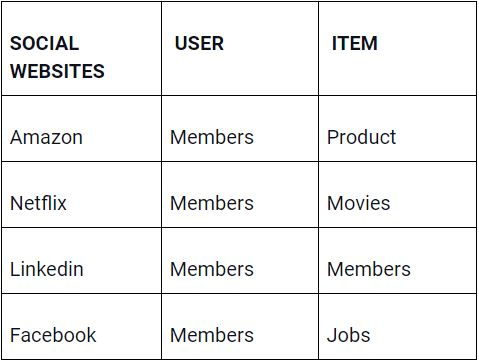

Companies who are using the recommendation system actively

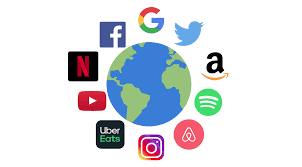

# Movie Recomendation System

The recomendation system is a system that filters all the videos or movies based on our preferences & our watch history and provides recommendations to the users.


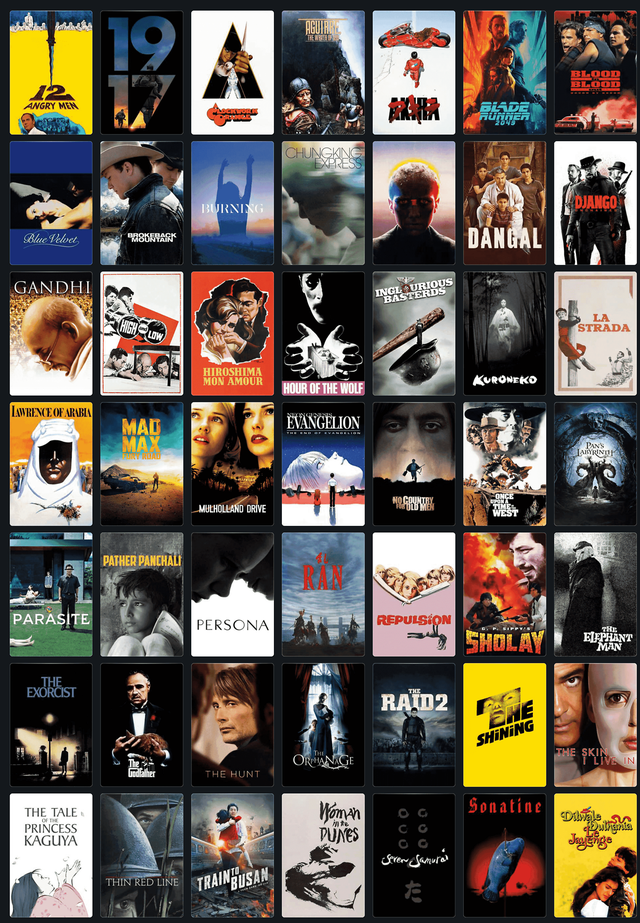

# Reading the dataset

For this algorithm we need to have two dataset which contains two CSV files. One is credits, and the other is a movie file. We will explore these files later. This file contains columns like budget for the movie, genres, homepage, id, keywords, original_language, original_title, overview, popularity, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, status, tagline, title, vote_average, vote_count.

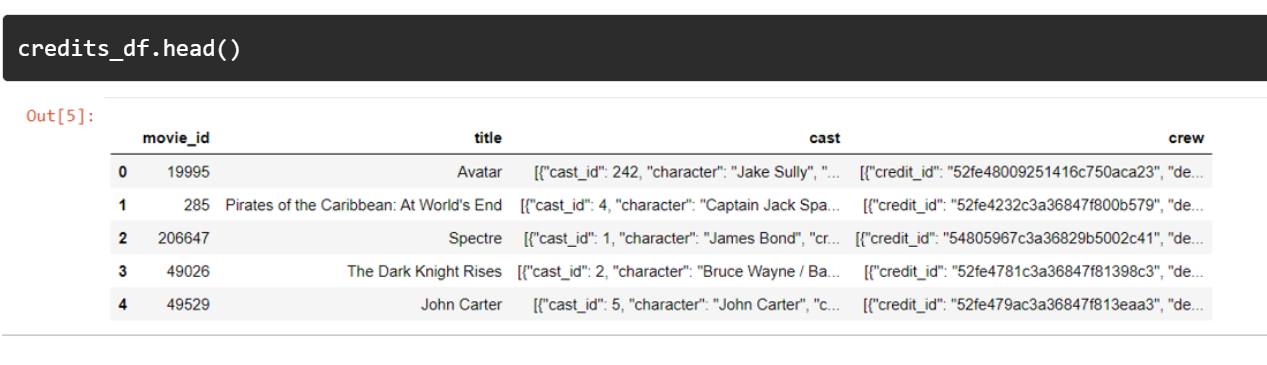

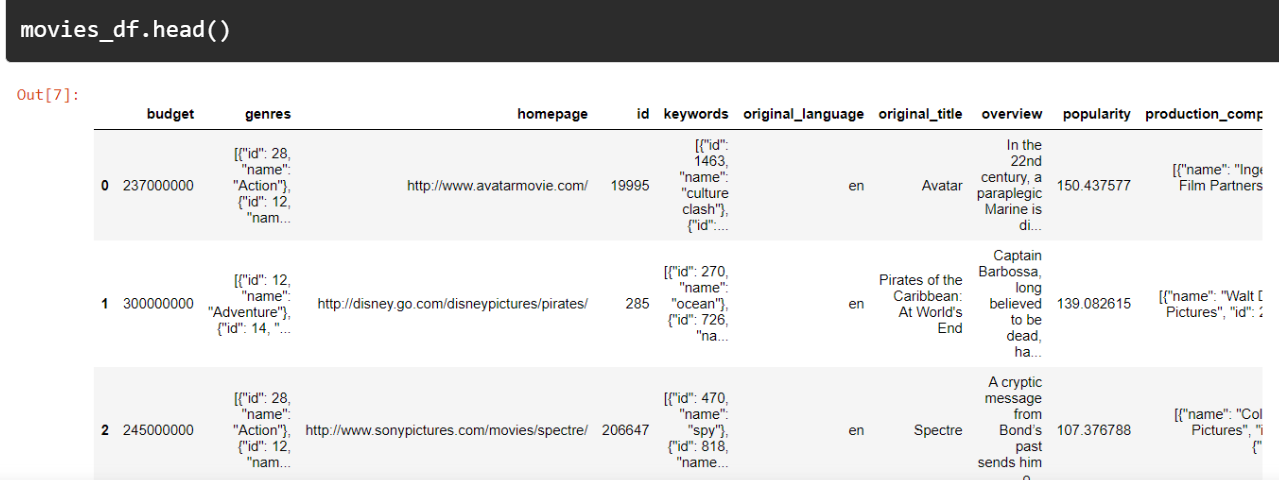

# Building  Movies Recommendation System

For Example, if a movie is searched, the recommendation system should suggest some other movies with the same director.
And it should also show some movies with the same cast and others with the same genre.

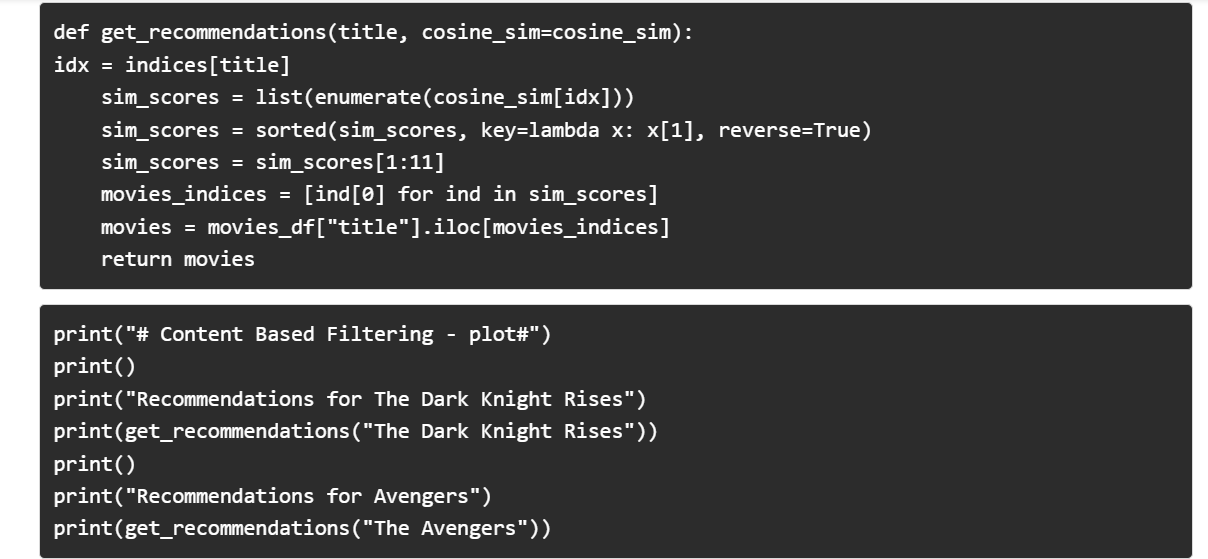

In the Above Screenshot, I have given a small snippet of Recommendation system .But As Usual Recommendation algorithms are very 
complex and lengthier.

# Testing the Movie recomender system.

Now let's print the recomendation for the Movie " The Dark Night Rises & The Avengers"

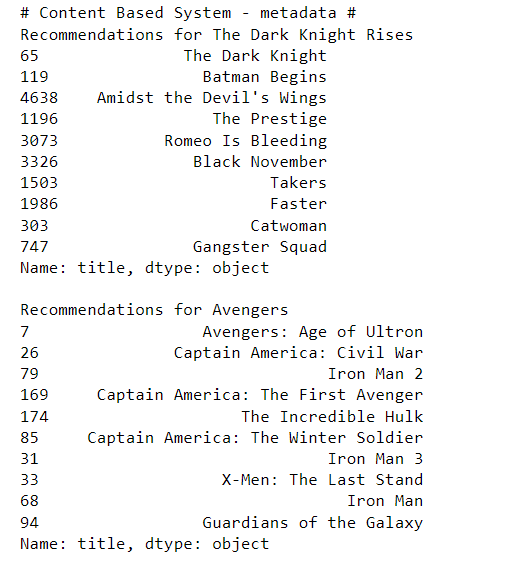